
o  o  o  o  o
o  o  o  o  o
x  o  o  o  o
o  o  o  o  o
o  o  o  o  T

finished after 262 timesteps
***** Question 1.2 *****
   0  1  2    3    4
0  ↓  ↓  ↓    ←  NaN
1  ↓  ←  ↓    ←  NaN
2  →  →  →    →    ↓
3  ↑  ↓  ↓    ↑    ↓
4  ↑  ←  ←  NaN    T

***** Policy evaluation *****

[[-106.82 -104.82 -101.38  -97.62  -95.08]
 [-104.82 -102.26  -97.7   -92.41  -88.53]
 [-101.38  -97.7   -90.74  -81.79  -74.11]
 [ -97.62  -92.41  -81.79  -65.89  -48.  ]
 [ -95.08  -88.53  -74.11  -48.      0.  ]]

***** Policy iteration *****

   0  1  2  3  4
0  ↓  →  →  →  ↓
1  ↓  ↓  →  ↓  ↓
2  ↓  ↓  →  →  ↓
3  ↓  ↓  ↓  →  ↓
4  →  →  →  →  T

[[-8. -7. -6. -5. -4.]
 [-7. -6. -5. -4. -3.]
 [-6. -5. -4. -3. -2.]
 [-5. -4. -3. -2. -1.]
 [-4. -3. -2. -1.  0.]]

***** Value iteration *****

   0  1  2  3  4
0  ↓  →  ↓  ↓  ↓
1  ↓  ↓  →  ↓  ↓
2  →  ↓  ↓  →  ↓
3  ↓  ↓  →  →  ↓
4  →  →  →  →  T

[[-8. -7. -6. -5. -4.]
 [-7. -6. -5. -4. -3.]
 [-6. -5. -4. -3. -2.]
 [-5. -4. -3. -2. -1.]
 [-4. -3. -2. -1.  0.]]
M

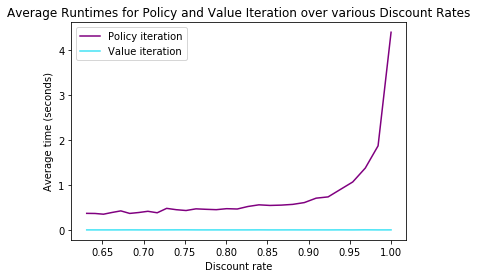

Done main


In [2]:
###
# Group Members
# Clarise Poobalan : 383321
# Nicolaas Cawood: 2376182
# Shikash Algu: 2373769
# Byron Gomes: 0709942R
###

import numpy as np
from environments.gridworld import GridworldEnv
import timeit
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

def policy_evaluation(env, policy, discount_factor=1.0, theta=0.00001):
    value_fcn=np.zeros((env.observation_space.n,1))#25 by 1, reshape afterwards  
    while True:
        old_value_fcn=value_fcn.copy()
        for state in range(env.observation_space.n):# 0-24
            value=0
            for actions,act_prob in enumerate(policy[state]):
                for  prob, next_state, reward, done in env.P[state][actions]:
                    value+=act_prob*(reward+discount_factor*value_fcn[next_state])
            value_fcn[state]=value
            change=abs(old_value_fcn-value_fcn).max()
        
        if change<theta:            
            value_fcn=value_fcn
            break   
    return value_fcn


def policy_iteration(env, policy_evaluation_fn=policy_evaluation, discount_factor=1.0):

    def one_step_lookahead(state, V):
        action_values=np.zeros((env.action_space.n,1))
        for act in range(env.action_space.n):
            for  prob, next_state, reward, done in env.P[state][act]:
                action_values[act]+=prob*(reward+discount_factor*V[next_state])       
        return action_values
    
    def random_index(array):
        amax=np.amax(array)
        index_list=[]
        for ran_ind in range(array.shape[0]):
            if array[ran_ind]==amax:
                index_list.append(ran_ind)
        return random.choice(index_list)
    
    old_policy=np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n #Initial Policy   
    count_test=0
    while True:
        policy_evaluation_fn=policy_evaluation(env, old_policy, discount_factor, theta=0.00001) #Call PE, ret Value Fcn
        V=policy_evaluation_fn
        
        
        policy_new=np.zeros((env.observation_space.n,env.action_space.n))
        
        for state_PI in range(env.observation_space.n):
            action_vals=one_step_lookahead(state_PI,V)
            ran_max_index=random_index(action_vals)
            #policy_new[state_PI][np.argmax(action_vals)]=1
            policy_new[state_PI][ran_max_index]=1
            
            old_act_max=np.argmax(old_policy[state_PI])
            policy_max=np.argmax(policy_new[state_PI])
            
        if old_act_max==policy_max and count_test>=1:
            break  

        old_policy=policy_new  
        count_test+=1
    return policy_new,V  
    


def value_iteration(env, theta=0.0001, discount_factor=1.0):


    def one_step_lookahead(state, V):
        action_values=np.zeros((env.action_space.n,1))
        for act in range(env.action_space.n):
            for  prob, next_state, reward, done in env.P[state][act]:
                action_values[act]+=prob*(reward+discount_factor*V[next_state])       
        return action_values


    def random_index(array):
        amax=np.amax(array)
        index_list=[]
        for ran_ind in range(array.shape[0]):
            if array[ran_ind]==amax:
                index_list.append(ran_ind)
       # print("random choices",index_list)
        return random.choice(index_list)
    
    value_fcn=np.zeros((env.observation_space.n,1))   
    #for i in range(100):
    while True:
        old_value=value_fcn.copy()
        for state in range(env.observation_space.n):
            action_values=one_step_lookahead(state,value_fcn)
            ran_max_ind=random_index(action_values)
            max_action_val=action_values[ran_max_ind]
            value_fcn[state]=max_action_val
        change=abs(old_value-value_fcn).max()    

        if (change)<theta:
            break
    
    policy=np.zeros((env.observation_space.n,env.action_space.n))
    for state in range(env.observation_space.n):
        action_vals=one_step_lookahead(state,value_fcn)
        ran_max_ind=random_index(action_vals)        
        policy[state][ran_max_ind]=1#max index
    #print(policy)
    
    return policy,value_fcn
    
    
    
    
    
def random_policy(env):
    action = env.action_space.sample(); #Action drawn        
    return action
    
def create_output_1_2(size,act_1,obs):
    action_arrows=[ '↑', '→', '↓', '←']
    columns_df=[]   
    for col in range(size):
        columns_df.append(col)
    df = pd.DataFrame( columns = columns_df,index=columns_df) 
    
    act_len=len(act_1)
  
    for i in range(len(act_1)):
        col, row = math.modf(obs[i]/5)
        row=int(row)
        col=int(obs[i]-row*size)
        hold=act_1[i]
        #print(hold,action_arrows[hold])
        
        if i ==0:
            df.iloc[row,col]=action_arrows[hold]+", S"
        else:
            df.iloc[row,col]=action_arrows[hold]

    
    df.iloc[size-1,size-1]="T"
    print(df)
    return  df

def create_output(size,index,policy):
    action_arrows=[ '↑', '→', '↓', '←']
    columns_df=[]   
    for col in range(size):
        columns_df.append(col)
    df = pd.DataFrame( columns = columns_df,index=columns_df) 
    
    for i in range(size*size):
        col, row = math.modf(i/5)
        #print("index: ",i,"row: ",row,"col: ",(i-row*size))
        row=int(row)
        col=int(i-row*size)
        df.iloc[row,col]=action_arrows[np.argmax(policy[i])]
    
    df.iloc[size-1,size-1]="T"
    print(df)
    return  df


def main():
    # Create Gridworld environment with size of 5 by 5, with the goal at state 24. Reward for getting to goal state is 0, and each step reward is -1
    env = GridworldEnv(shape=[5, 5], terminal_states=[
                       24], terminal_reward=0, step_reward=-1)
    state = env.reset()
    print("")
    env.render()
    print("")

    # TODO: generate random policy
##########################################################################################################################  
    obs=[];
    act_1=[];
    for i_episode in range(1):
        observation = env.reset();
        for t in range(1000):
            obs.append(observation);      

            if observation!=24:
                action_1 = random_policy(env) ;#Action drawn
                act_1.append(action_1);
                observation, reward, done, info = env.step(action_1) ;#take action
            else:
                print("finished after {} timesteps".format(t+1))
                break
    env.close();
    print("*" * 5 + " Question 1.2 " + "*" * 5)
    df=create_output_1_2(5,act_1,obs)
    print("")
##########################################################################################################################

    print("*" * 5 + " Policy evaluation " + "*" * 5)
    print("")

    # TODO: evaluate random policy
####################################################################################################################
    policy = np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n 
    v=policy_evaluation(env, policy, discount_factor=1.0, theta=0.00001)
    
    hold=v.reshape((env.shape[0],env.shape[1]))
    hold=np.round(hold,2)
    print(hold)
    
   # v = []

    # TODO: print state value for each state, as grid shape

    # Test: Make sure the evaluated policy is what we expected
    expected_v = np.array([-106.81, -104.81, -101.37, -97.62, -95.07,
                           -104.81, -102.25, -97.69, -92.40, -88.52,
                           -101.37, -97.69, -90.74, -81.78, -74.10,
                           -97.62, -92.40, -81.78, -65.89, -47.99,
                           -95.07, -88.52, -74.10, -47.99, 0.0])
    expected_v=expected_v[:,np.newaxis]
    np.testing.assert_array_almost_equal(v, expected_v, decimal=2)
    
    
#########################################################################################################################
    print("")
    print("*" * 5 + " Policy iteration " + "*" * 5)
    print("")
    
    # TODO: use  policy improvement to compute optimal policy and state values
#######################################################################################################################
    policy, v = policy_iteration(env, policy_evaluation_fn=policy_evaluation, discount_factor=1.0)

    # TODO Print out best action for each state in grid shape
    out_PI=create_output(env.shape[0],1,policy)
    print("")
    # TODO: print state value for each state, as grid shape
    print(v.reshape((env.shape[0],env.shape[1])))

    # Test: Make sure the value function is what we expected
    expected_v = np.array([-8., -7., -6., -5., -4.,
                           -7., -6., -5., -4., -3.,
                           -6., -5., -4., -3., -2.,
                           -5., -4., -3., -2., -1.,
                           -4., -3., -2., -1., 0.])
    #expected_v=expected_v[:,np.newaxis]
    np.testing.assert_array_almost_equal(v, expected_v[:,np.newaxis], decimal=1)
#########################################################################################################################
    print("")
    print("*" * 5 + " Value iteration " + "*" * 5)
    print("")
    # TODO: use  value iteration to compute optimal policy and state values
    policy, v =value_iteration(env, theta=0.0001, discount_factor=1.0)

    # TODO Print out best action for each state in grid shape
    out_VI=create_output(env.shape[0],1,policy)
    print("")
    # TODO: print state value for each state, as grid shape
    print(v.reshape((env.shape[0],env.shape[1])))

    # Test: Make sure the value function is what we expected
    expected_v = np.array([-8., -7., -6., -5., -4.,
                           -7., -6., -5., -4., -3.,
                           -6., -5., -4., -3., -2.,
                           -5., -4., -3., -2., -1.,
                           -4., -3., -2., -1., 0.])
    expected_v=expected_v[:,np.newaxis]
    np.testing.assert_array_almost_equal(v, expected_v, decimal=1)


if __name__ == "__main__":
    main()
print("Main")
gamma_arr = np.logspace(-0.2, 0, num=30)
policy_iter_times = []
value_iter_times = []
policy_setup = '''
from __main__ import policy_iteration
from environments.gridworld import GridworldEnv
env = GridworldEnv(shape=[5, 5], terminal_states=[24], terminal_reward=0, step_reward=-1)
'''
value_setup = '''
from __main__ import value_iteration
from environments.gridworld import GridworldEnv
env = GridworldEnv(shape=[5, 5], terminal_states=[24], terminal_reward=0, step_reward=-1)
'''
for gamma in gamma_arr:
    policy_iter_times.append(timeit.timeit(setup = policy_setup, stmt = "policy_iteration(env,discount_factor=" + str(gamma) + ")", number = 100))
    value_iter_times.append(timeit.timeit(setup = value_setup, stmt = "value_iteration(env,discount_factor=" + str(gamma) + ")", number=10))

# plt.plot(gamma_arr, policy_iter_times, color="purple", label='Policy iteration')
# plt.plot(gamma_arr, value_iter_times, color="#42e3f5", label='Value iteration')

#Need to div by 10 for average - https://www.geeksforgeeks.org/timeit-python-examples/

avg_policy_iter_times=[]
for pol in policy_iter_times:
    avg_policy_iter_times.append(pol/10)
    
avg_value_iter_times=[]
for val in value_iter_times:
    avg_value_iter_times.append(val/10)
    
    
plt.plot(gamma_arr, avg_policy_iter_times, color="purple", label='Policy iteration')
plt.plot(gamma_arr, avg_value_iter_times, color="#42e3f5", label='Value iteration')
plt.title('Average Runtimes for Policy and Value Iteration over various Discount Rates')
plt.legend()
plt.xlabel('Discount rate')
plt.ylabel('Average time (seconds)')
plt.show()
print("Done main")

